# Session 2.1
## Linear regression---introduction
- Regression is a statistical analysis process for determining the relationship between independent variables and dependent variables having numerical values
- Basically, regression is what is commonly referred to as 'fitting a line to the data'
- Here's an example with some artificially generated data
    - Data is generated according to the function $y = \beta_{0} + \beta_{1}x + \beta_{2}x^{2} + \beta_{3}x^{3} + \epsilon$, where $\epsilon$ is randomly generated noise
    - The objective is to find the model parameters $\vec{\beta}=\left(\beta_{0}, \beta_{1}, \beta_{2}, \beta_{3}\right)$ that fit the data best

##### Create a random model, sample data with errors, fit a model to the data

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model


# Independent variable measurements; no error
N = 25   # Number of measurements/samples
xs = 2*np.random.rand(N)

# Dependent variable measurements w/ error
beta_0 = np.random.normal(size = 1)[0]-0.5        # beta_0 is y-intercept
beta_1 = np.random.normal(size = 1)[0]-0.5        # beta_1 is linear term
beta_2 = np.random.normal(size = 1)[0]-0.5        # beta_2 is quadratic term
beta_3 = np.random.normal(size = 1)[0]-0.5        # beta_3 is cubic term
ys_true = beta_0 + beta_1*xs + beta_2*xs**2 + beta_3*xs**3

errors = 1*np.random.normal(size = N)

ys_measured = ys_true + errors    # Measured data is true data plus error measurement


# Create and train a model to fit the data using sklearn.linear_model.LinearRegression()
X = np.hstack((xs.reshape(-1,1), (xs**2).reshape(-1,1), (xs**3).reshape(-1,1)))
model = sklearn.linear_model.LinearRegression()
model.fit(X, ys_measured)


# Print real vs determined coefficients
betas = [beta_0, beta_1, beta_2, beta_3]
print('Model coefficients')
print('actual\t\t determined')
print(round(model.intercept_, 3), '\t\t', round(beta_0, 3))
for i in range(len(model.coef_)):
    print(round(betas[i+1], 3), '\t\t', round(model.coef_[i], 3))

Model coefficients
actual		 determined
0.273 		 -0.308
-2.694 		 -3.62
0.45 		 0.854
-1.601 		 -1.753


##### Plot data and model fits

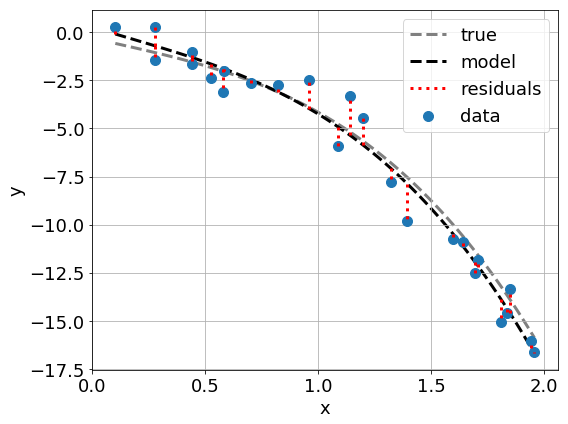

In [2]:
# Create the figure
fig = plt.figure(figsize = (8,6))

# Plot the data
plt.scatter(xs, ys_measured, s = 100, zorder = 2, label = 'data')

# Plot the generating function
temp_xs = np.linspace(xs.min(), xs.max(), 100).reshape(-1,1)
y_trues = beta_0 + beta_1*temp_xs + beta_2 * temp_xs**2 + beta_3 * temp_xs**3
plt.plot(temp_xs, y_trues, ls = '--', lw = 3, c = 'gray', zorder = 1, label = 'true')

# Plot the model/predictions
temp_xs = np.linspace(xs.min(), xs.max(), 100).reshape(-1,1)
temp_X = np.hstack((temp_xs, temp_xs**2, temp_xs**3))
y_predictions = model.predict(temp_X)
plt.plot(temp_xs, y_predictions, ls = '--', lw = 3, c = 'k', zorder = 1, label = 'model')

# Plot the residuals
for i in range(N):
    y_predicted = model.predict(np.array([xs[i], xs[i]**2, xs[i]**3]).reshape(1,3))
    plt.plot([xs[i], xs[i]], [y_predicted, ys_measured[i]], color = 'red', ls = ':', lw = 3)
plt.plot([],[], color = 'red', ls = ':', lw = 3, label = 'residuals')

plt.xlabel('x', size = 18)
plt.ylabel('y', size = 18)
plt.grid()
plt.tick_params(labelsize = 18)
plt.legend(loc = 'best', fontsize = 18)

fig.tight_layout()


# plt.savefig('./images/lr_plot.png', dpi = 100)

plt.show()

- Notice that we fit a * non-linear function * using *linear regression*; 
- The *linear* part of 'linear regression' is a bit of a misnomer; linear in this case means that the output $y$ is a linear function of the *model parameters* $\beta$; not the independent variables $x$
- Let's dive in to figuring out how linear regression works, and then use it on a real data set

## The goal of linear regression
- In a regression problem we start with some data that we know the inputs $\vec{x}^{i}$ and outputs $y^{i}$ for; we wish to train a model with parameters $\vec{\beta}$ to make output predictions $\hat{y}^{i}_{new}$ on new input data $\vec{x}^{i}_{\mathrm{new}}$ 
- Let's look at x, beta, y, and yhat in greater detail
- We'll use house prices as our regression example, where the objective is to predict the price of a house given some information about it


#### $\vec{x}^{i}$, the ** vector of features **, or inputs to our model:

- $\left(1\times \left(K+1\right)\right)$ column vector
- $ \vec{x^{i}}=\left(x^{i}_{0},x^{i}_{1},...,x^{i}_{K}\right)$
- $x^{i}_{j}$ corresponds to ** feature ** j for house i
- Features could include square footage, year built, etc.
- These vectors are the input for our model; for each house, we have one vector of features
- We typically use linear features; for instance, we plug square footage directly into the model, but we could also include transformed features such as sin(feature) or feature$^{2}$; in the above example, $x$ was our feature, and we included polynomial terms up to $x^{3}$ in the model


#### $\vec{\beta}$, the ** model parameters **:

- $\left(\left(K+1\right)\times1\right)$ column vector
- $ \vec{\beta}=\left(\begin{array}{c}\beta_{0} \\ \beta_{1} \\ \vdots \\ \beta_{K}\end{array}\right) $
- $\vec{\beta}$ is a column vector of model parameters
- Each feature $j$ has one parameter $\beta_{j}$, which indicates how significantly feature $j$ affects the price of the home
- For instance, if the model parameter for square footage is $\beta_{SF}$, it means our model predicts that every square foot in a house adds $\beta_{SF}$ dollars to the price of the home



#### $x_{0}, \beta_{0}$, the ** intercept terms **

- In a regression problem, we have $K$ features but $K+1$ terms in the input $\vec{x}$ and model paramter $\vec{\beta}$ vectors; where does the $+1$ come from?
- If all of our input features $x_{1}, x_{2}, ..., x_{K}=0$, then our output $y$ can be non-zero; 
- For instance, in a simple linear model $y=mx+b$, we have a y-intercept term $b$ to account for the offset
- For this reason, we add an $x_{0}=1$ feature to every data point and a $\beta_{0}$ that behaves just like any other model parameter
- With the inclusion of $x_{0}$ and $\beta_{0}$, our models can account for offsets in $y$ at the origin of the parameter space
- In the context of house prices, we might find that $\beta_{0}$ corresponds to the cost of simply a license fee to own a home, and is completely independent of the home's features




#### $y^{i}$ the actual ** price ** of home $i$





#### $\hat{y}^{i}$ model's ** predicted price ** for home $i$


- Our model maps input $\vec{x}^{i}$ to predicted output $\hat{y}^{i}$ via $$\begin{align} \vec{x}^{i}\vec{\beta}&=\hat{y}^{i} \\ x_{0}^{i}\beta_{0}+x_{1}^{i}\beta_{1}+x_{2}^{i}\beta_{2}+...+x_{K}^{i}\beta_{K}&=\hat{y}^{i} \end{align}$$

        
### In summary
- The objective of linear regression is to use existing data $\vec{x}^{i}$ and $y^{i}$ to learn to make accurate predictions on new data $\vec{x}^{i}_{new}$
- We create a model with parameters $\vec{\beta}$ which map the inputs $\vec{x}^{i}$ to the outputs $y^{i}$ * via * the relationship $\vec{x}^{i}\vec{\beta}=\hat{y}^{i}$

## <font color="red">Student activity: Loading the data set (30 minutes)</font>
- For our linear regression example problem, we're going to be working with a data set containing house prices
- For now, let's just load the data set
- By now we should all be familiar with loading data using `numpy` :)


Instructions:

- The file './data/train_reduced.csv' contains data on houses and their sale price, as well as a header row containing the names of all the features and the label for the output variable 


1. Create a list of the feature names
    - Hints: 
        - Use open() and the csv.reader() object to extract the first row from the file
        - Skip the output column; we're only interested in the input features
2. Write a function that `return`s the correct column index of a given feature name; `raise` a `ValueError()` if the feature is not found
    - Call this function `GetColumnIndex(index)`
   
3. Load the file into a single `numpy` matrix
    - Remember to skip the header line
3. Move the inputs $\vec{x}^{i}$ into a matrix X_train, where each row contains the data for one home
    - Remember that we must usually input an additional 1 to every input! This corresponds to the intercept term described above. Don't worry about it for this example; we're going to use a library to perform linear regression for us which can automatically handle the intercept fitting
4. Move the outputs into a numpy column vector $\vec{y}$ called y_train
5. Answer the follow up questions

In [3]:
##########################
# Insert solution below! #
%reset -f
##########################



# imports
import csv
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model



# Print columns to see which column is output
file_path = '../data/house/train_reduced.csv'
with open(file_path, 'r') as file_handle:
    file_reader = csv.reader(file_handle, delimiter = '\t')
    header = next(file_reader)
print(header)    

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [4]:
# 'SalePrice' output is last column; don't include this one in our list of feature names


features = header[:-1]

def GetColumnIndex(feature_name):
    for i in range(len(features)):
        if feature_name == features[i]:
            return i
        
    raise ValueError('Could not find column ' + str(feature_name))

In [5]:
output_column = -1

# Load the data
file_path = '../data/house/train_reduced.csv'
data_train = np.genfromtxt(file_path, delimiter = '\t', skip_header = 1)

# Split the data into X (inputs) and y (outputs)
X_train = data_train[:,:-1]
y_train = data_train[:,-1]

##### <font color="red">Determine the average, maximum, and minimum sale prices of the training data set</font>

In [6]:
##########################
# Insert solution below! #
##########################





print('mean = ', np.mean(y_train))
print('max = ', np.max(y_train))
print('min = ', np.min(y_train))

mean =  180921.19589
max =  755000.0
min =  34900.0


##### <font color="red">Plot a histogram of the sale prices in the training set with 20 bins</font>

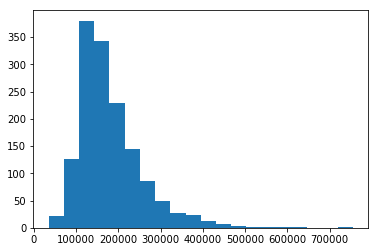

In [7]:
##########################
# Insert solution below! #
##########################





plt.hist(y_train, bins = 20)
plt.show()

##### <font color="red">Determine the average, maximum, and minimum square footages of the houses in the training set</font>

In [8]:
##########################
# Insert solution below! #
##########################



index = GetColumnIndex('GrLivArea')
sq_footage = X_train[:,index]

print('mean = ', np.mean(sq_footage))
print('max = ', np.max(sq_footage))
print('min = ', np.min(sq_footage))

mean =  1515.46369863
max =  5642.0
min =  334.0


##### <font color="red">Create a scatter plot of house price vs square footage ('GrLivArea'). Are the variables correlated?</font>

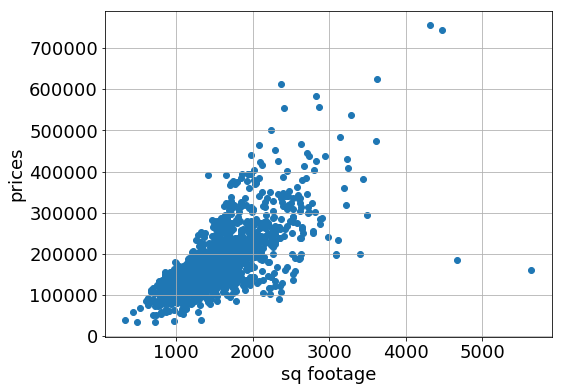

In [9]:
##########################
# Insert solution below! #
##########################




index = GetColumnIndex('GrLivArea')

sq_footage = X_train[:,index]
prices = y_train



# Create plot
fig = plt.figure(figsize = (8,6))
plt.scatter(sq_footage, prices)

plt.xlabel('sq footage', size = 18)
plt.ylabel('prices', size = 18)
plt.grid()
plt.tick_params(labelsize = 18)

plt.show()

##### <font color="red">Create a scatter plot of house price vs unfinished basement square footage ('BsmtUnfSF'). Are the variables correlated?</font>

/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


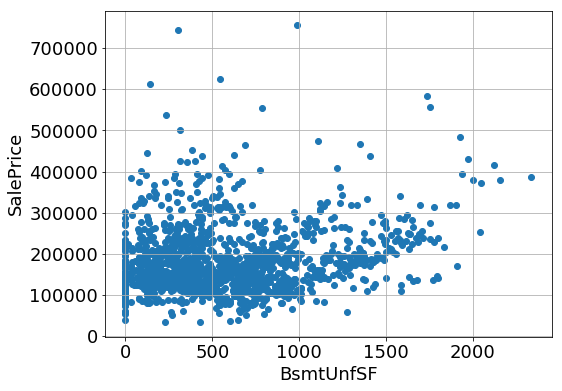

In [10]:
##########################
# Insert solution below! #
##########################

index = GetColumnIndex('BsmtUnfSF')

# Make plot
fig = plt.figure(figsize = (8,6))
plt.scatter(X_train[:,index], y_train)

plt.xlabel('BsmtUnfSF', size = 18)
plt.ylabel('SalePrice', size = 18)

plt.grid()
plt.tick_params(labelsize = 18)
plt.legend(loc = 'upper left', fontsize = 18)

plt.show()

## How do we train the model?
- Great! Now we have the feature vectors $\vec{x}$ and outputs $y$ loaded, and we performed some light exploratory data analysis
- Now, how do we actually train the $\beta$s?
- Simply put, we need a function that describes the prediction performance of the model on the training set, and then find model parameters $\vec{\beta}$ that lead to the best performance

- This pseudo-algorithm immediately raises two questions:
    1. Which function do we choose as a metric for our model's performance?
    2. Given this function, how do we find the $\beta$ that minimize it?

### 1. Assessing a model's performance: The loss function
- ** Loss functions ** are a class of functions that connect the performance of a model with the deviation of the predicted outputs from the actual outputs, $\hat{y}^{i}-y^{i}$
- One possible loss function is the residual sum of squares, or ** RSS **, given by the following formula

$$ \begin{align} \mathrm{RSS}&=\sum_{i=0}^{N-1}\left(\hat{y}^{i}-y^{i}\right)^{2} \\
\mathrm{RSS}\left(\vec{\beta}\right)&=\sum_{i=0}^{N-1}\left(\vec{x}^{i}\vec{\beta}-y^{i}\right)^{2} \\
\mathrm{RSS}\left(\vec{\beta}\right)&=\sum_{i=0}^{N-1}\left(\beta_{0}x_{0}^{i}+\beta_{1}x_{1}^{i}+...+\beta_{K}x_{K}^{i}-y^{i}\right)^{2} \end{align} $$

- Pictorially, the RSS is the sum of the squares of all the red dotted lines in the following plot:

![lr_plot](../images/lr_plot.png)


$\DeclareMathOperator*{\argminB}{argmin}$

### 2. Finding the model parameters $\vec{\beta}^{*}$ that minimize the loss


- Great, now we have a function that serves as a performance metric for the model; how do we minimize it?
- Generally there are two strategies to function minimization:
    1. ** Analytically minimizing **: Take a derivative of the function, find the point where it is equal to zero, i.e. solve $\nabla_{\vec{\beta}}RSS=0$ for $\vec{\beta}$
    2. ** Numerically minimizing **: Calculate the RSS for some sets of parameters $\beta$ and choose the $\beta$ for which the RSS is the lowest
    
- In linear regression, we can actually take the calculus approach and solve for the optimum $\vec{\beta}$ manually
- But, in many optimization problems the only viable approach is numerical, so that's the method we're going to use
- There are many possible numerical approaches to minimizing a function, one popular and intuitive one is ** gradient descent **

##### Gradient descent
- Imagine what the residual sum of squares function $\mathrm{RSS}\left(\vec{\beta}\right)$ looks like
- At the optimum position $\vec{\beta}^{*}$ the $\mathrm{RSS}$ is at its minimum value
- Very far away from $\vec{\beta}^{*}$ the $\mathrm{RSS}$ is large; for bad model parameters the error is huge
- The topography of $\mathrm{RSS}$ is like a multidimensional rounded-pit with lowest position $\vec{\beta}^{*}$
- Using ** gradient descent ** we start at some arbitrary position in the $\vec{\beta}$ parameter space---usually along the slope of the pit---and slowly walk downhill by following the direction of the (negative) gradient of the cost function with respect to beta
- Once at the bottom of the pit we stop, and declare our position $\vec{\beta}^{*}$ to be the optimum
- The following scheme shows gradient descent being performed in a two-dimensional parameter space; the lines represent the RSS contour lines. In most cases, we'll be working with $K>2$
![gradient descent](../images/gradient_descent_1.png)




### Scikit-learn
- We could code gradient descent ourselves, but Python already has a package called scikit-learn that does the work for us; no need to reinvent the wheel
- The example at the beginning of this session used scikit-learn to perform linear regression on an artificial data set
- ** sci-kit learn usage **:
    - ** Create an empty linear regression model ** using 
        - `model = sklearn.linear_model.LinearRegression()`
    - ** Fit the model** using 
        - `model.fit(X_train, y_train)`
    - To ** make predictions on new input data `X_new` **, use 
        - `y_new_predicted = model.predict(X_new)`
    - Simple!

## <font color="red">Exercise: Training a linear regression model to make accurate predictions (20 minutes)
1. Create a `sklearn` `LinearRegression` model
2. Fit the model to the training data loaded previously
    - (Psst... Remember those X_train and y_train numpy arrays you created earlier?)
3. Load the file `./data/unappraised_houses.csv`, which contains some house prices with the same input features, but which haven't been priced or sold yet
    - The data is formatted same as before, but this time we don't have to separate inputs and outputs since the sale price is not included
4. Predict the sales prices for these unappraised homes
5. Print the prices of the unappraised homes
6. Answer the follow up questions

In [11]:
##########################
# Insert solution below! #
##########################

# Create an empty linear regression model
model = sklearn.linear_model.LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Load the unappraised data
X_unappraised = np.genfromtxt('../data/house/unappraised_houses.csv', skip_header = 1, delimiter = ',')


# Make predictions on the test data
y_unappraised_predicted = model.predict(X_unappraised)

##### <font color="red">Displaying the determined coefficients </font>

sklearn.linear_model.LinearRegression is a Python `class`, which in addition to its methods for fitting a model and making predictions also stores member variables pertaining to the model, including the values of the determined coefficients $\beta$

Print the list of feature names alongside the coefficients determined by sklearn. In addition to the features, also print the value of the intercept.

Hint: Look up the `sklearn.linear_model.LinearRegression` class in the [scikit-learn docs](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to figure out the name of the coefficients member variable and the intercept member variable. Once you figure out the name of the coefficients and intercept member variable, use model.[variable name] to get the value of the variable.

In [12]:
##########################
# Insert solution below! #
##########################


# Doc location: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# Or, just google 'sklearn linear regression'
# Model intercept stored in model.intercept_
# Model coefficients stored in model.coef_

print('intercept', '\t', model.intercept_)
for i in range(len(features)):
    print(features[i], '\t', model.coef_[i])

intercept 	 466004.0231
MSSubClass 	 -181.594373279
LotFrontage 	 -56.2298851621
LotArea 	 0.430013542703
OverallQual 	 17323.8404273
OverallCond 	 4664.87498917
YearBuilt 	 271.650369553
YearRemodAdd 	 136.07803362
MasVnrArea 	 31.4639297655
BsmtFinSF2 	 -10.9157207274
BsmtUnfSF 	 -9.8876202549
TotalBsmtSF 	 19.200086471
1stFlrSF 	 18.0582932585
2ndFlrSF 	 18.1015662916
LowQualFinSF 	 -5.26817412278
GrLivArea 	 30.8916854169
BsmtFullBath 	 9359.12950458
BsmtHalfBath 	 2037.72192112
FullBath 	 3448.26879965
HalfBath 	 -1899.58357137
BedroomAbvGr 	 -10095.9951219
KitchenAbvGr 	 -12209.6933988
TotRmsAbvGrd 	 5063.41326469
Fireplaces 	 3966.43044195
GarageYrBlt 	 121.154691593
GarageCars 	 11234.6410206
GarageArea 	 -4.23646789063
WoodDeckSF 	 24.0215541972
OpenPorchSF 	 -2.87114196208
EnclosedPorch 	 11.8267941949
3SsnPorch 	 20.496172612
ScreenPorch 	 56.0046683825
PoolArea 	 -29.0824807421
MiscVal 	 -0.73018238312
MoSold 	 -50.0874307914
YrSold 	 -780.459753404


##### <font color="red">What was the square footage of the cheapest house? The most expensive? Create a scatter plot of predicted price vs square footage. Did the model's predictions for sales price monotonically increasing with square footage?</font>

Hints:
    - np.argsort() will return the indices of the sorted array (low to high)

cheapest house sqft 864.0
most expensive house sqft 2633.0


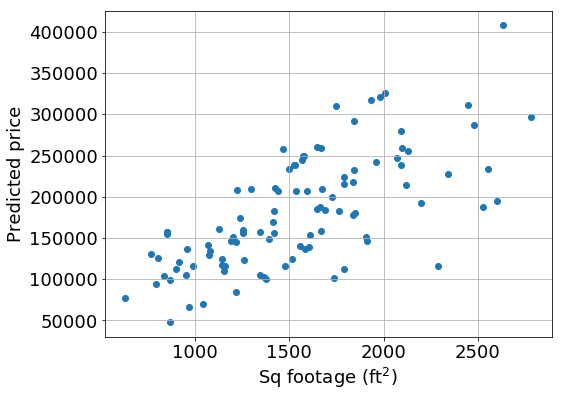

In [13]:
##########################
# Insert solution below! #
##########################

# Get column index for square footage
index = GetColumnIndex('GrLivArea')


# Get the cheapest house's sqftage
print('cheapest house sqft', X_unappraised[np.argsort(y_unappraised_predicted)[0], index])


# Get the most expensive house's sqftage
print('most expensive house sqft', X_unappraised[np.argsort(y_unappraised_predicted)[-1], index])


# Create plot
fig = plt.figure(figsize = (8,6))
plt.scatter(X_unappraised[:,index], y_unappraised_predicted)


plt.xlabel('Sq footage (ft$^{2}$)', size = 18)
plt.ylabel('Predicted price', size = 18)
plt.tick_params(labelsize = 18)
plt.grid()

plt.show()

## Validating our model
- Great, now we have a trained model and we can use it to make predictions on new data
- However, now we have a new question: Is the model any good?
- Let's recall how we came up with the model parameters:
    - First, we defined a loss function known as the residual sum of squares (RSS) that is a measure of the model's error under parameters $\vec{\beta}$
    - Then, we minimized this error for the ** training set ** to determine the best parameters
- This approach is great, but it doesn't give us any insight into how well the model performs on ** new data **, we only know that our model parameters $\vec{\beta}$ are the best possible for the training set
- In fact, our model is almost certainly guaranteed to have a larger RSS on new data than on the training data since we don't optimize for the new data
- The following plot shows the RSS contours for two different data sets. Notice that the optimum parameters $\vec{\beta}^{*}$ for each set are separated, and that the contours have different shapes as well

![](../images/gradient_descent_2.png)

- It's super important that we know how well our model performs on data that it did not train on
- How do we get over this hurdle?

#### ** Training and test data **
- Here's an idea, let's reserve some of the training data and keep it separate from the data we actually ** train ** on
- Since we know the correct answers for the training data set, we can use it to ** test ** our model's performance, which should give us some indication of how well our model performs on data it did not train on
- So, our ** original training set ** is now split into a ** new training set ** and a ** test set **
- There's a trade off here: We lose some valuable data that could be used to train our  model and possibly make it better, but the benefit is that we now have a means of estimating how accurate our model will be for new data
- This is generally considered a good trade
- Still, we want to train our model on as much of the data as possible; for this reason, it's common to go with an 80/20 training/test split

## <font color="red">Exercise: Training a linear regression model to make accurate predictions (20 minutes)
1. Load the same data set from the './data/training.csv' file
2. Split the data set into inputs X and outputs y
3. Split the data set * again *, but this time into a training and test split of approximately 80%/20% relative shares
4. Create a linear regression model, train it on the training data, and make predictions on the test data
5. Answer the follow up questions

In [14]:
##########################
# Insert solution below! #
##########################

output_column = -1

# Load the data
file_path = '../data/house/train_reduced.csv'
data = np.genfromtxt(file_path, delimiter = '\t', skip_header = 1)

# Split the data into X (inputs) and y (outputs)
X = data_train[:,:-1]
y = data_train[:,-1]

# Split the data into training and test split
N = X.shape[0]
N_train = int(0.8*N)

X_train = X[:N_train,:]
y_train = y[:N_train]

X_test = X[N_train:,:]
y_test = y[N_train:]


# Create model, train model, test model
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_test_predicted = model.predict(X_test)

##### <font color="red">Write a function `CalculateRMSE()` to calculate the 'root mean squared error' (RMSE) of predictions

- The RMSE is given by $$ \mathrm{RMSE}=\sqrt{\frac{\mathrm{RSS}}{N}}, $$ which represents the standard deviation of the residuals, a good measure of how far off our predictions are</font>



- The function should take as arguments the actual house prices $y$ and the predicted house prices $\hat{y}$

In [15]:
##########################
# Insert solution below! #
##########################

def CalculateRMSE(y_predicted, y):
    N = y_predicted.shape[0]
    RSS = np.dot((y_predicted - y).T, (y_predicted - y))
    RMSE = np.sqrt(RSS/N)
    return RMSE

##### <font color="red">Calculate the RMSE of the training data and the test data. Which is higher? Why?

In [16]:
##########################
# Insert solution below! #
##########################



print('test errors', CalculateRMSE(y_test_predicted, y_test))


y_train_predicted = model.predict(X_train)
print ('train errors', CalculateRMSE(y_train_predicted, y_train))



# The test_error is greater than the train_error.
#
# This makes sense because we fit our model to the training data; we are guaranteed to have the best
# possible model *for that data*.
#
# Other data sets are likely to have a greater error, but we expect that that error will be a better reflection of
# our model's true performance.

test errors 49835.2366482
train errors 30632.9166014


### Summary
- Linear regression is a technique for building models that can be trained on known data to make predictions for unknown data
- 'Training' comes down to minimizing the sample 'Residual Sum of Squares' (RSS) with respect to the model parameters $\beta$
- The RSS function can be minimized analytically (solve $\nabla_{\vec{\beta}}RSS=0$), or numerically, using for instance gradient descent
- The `scikit-learn` Python package can be used to automatically create, train, and make predictions from models
- We found that our model was able to make predictions on the data set it trained on (training set) that were better than its predictions on new data it didn't optimize for (test set)
- This problem is known as * overfitting *, and making models that are more generalizable to new data is a massively important topic in machine learning
- In the next session we'll discuss logistic regression, a regression technique that can be used to make classification predictions